In [16]:
import pandas as pd
import warnings
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# EDA

In [2]:
data = pd.read_csv('winemag-data-130k-v2.csv')
data = data.drop(columns=['Unnamed: 0'])

In [3]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Пропущенные значения

In [4]:
def missing_data_percentage(column):
    percentage = (data[column].isna().sum()/len(data[column])) * 100
    print('{} column - missing data percentage: {:.2f} %' .format(column, percentage))

In [5]:
for column in data.columns:
    missing_data_percentage(column)

country column - missing data percentage: 0.05 %
description column - missing data percentage: 0.00 %
designation column - missing data percentage: 28.83 %
points column - missing data percentage: 0.00 %
price column - missing data percentage: 6.92 %
province column - missing data percentage: 0.05 %
region_1 column - missing data percentage: 16.35 %
region_2 column - missing data percentage: 61.14 %
taster_name column - missing data percentage: 20.19 %
taster_twitter_handle column - missing data percentage: 24.02 %
title column - missing data percentage: 0.00 %
variety column - missing data percentage: 0.00 %
winery column - missing data percentage: 0.00 %


In [6]:
data.drop(["region_2"], axis = 1, inplace=True)

In [7]:
def fill_na(column):
    if column.isnumeric():
        print(data[column])
        data[column].fillna(data[column].median(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [8]:
for column in data.columns:
    fill_na(column)
    missing_data_percentage(column)

country column - missing data percentage: 0.00 %
description column - missing data percentage: 0.00 %
designation column - missing data percentage: 0.00 %
points column - missing data percentage: 0.00 %
price column - missing data percentage: 0.00 %
province column - missing data percentage: 0.00 %
region_1 column - missing data percentage: 0.00 %
taster_name column - missing data percentage: 0.00 %
taster_twitter_handle column - missing data percentage: 0.00 %
title column - missing data percentage: 0.00 %
variety column - missing data percentage: 0.00 %
winery column - missing data percentage: 0.00 %


## Выбросы

In [9]:
columns = data.columns

Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1

print("Q1")
print(Q1)
print("Q3")
print(Q3)
print("IQR")
print(IQR)

Q1
points    86.0
price     18.0
Name: 0.25, dtype: float64
Q3
points    91.0
price     40.0
Name: 0.75, dtype: float64
IQR
points     5.0
price     22.0
dtype: float64


In [10]:
print('Уникальные значения:')
for column in data.columns:
    print(column,'=', data[column].nunique())

Уникальные значения:
country = 43
description = 119955
designation = 37979
points = 21
price = 390
province = 425
region_1 = 1229
taster_name = 19
taster_twitter_handle = 15
title = 118840
variety = 707
winery = 16757


**taster_name** и **taster_twitter_handle** являются личной информацией и не нужны в данном анализе, поэтому они будут удалены.

In [11]:
data.drop(["taster_name", "taster_twitter_handle"], axis = 1, inplace=True)

In [12]:
LB = LabelEncoder()
data[["country_encoded"]] = data[["country"]].apply(LB.fit_transform)

In [13]:
X = data[['country_encoded','points','price']]

<AxesSubplot:>

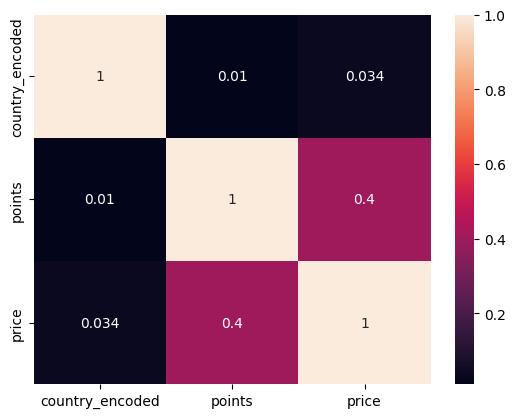

In [18]:
sns.heatmap(X.corr(),annot=True)

Сильной линейной связи не наблюдается.

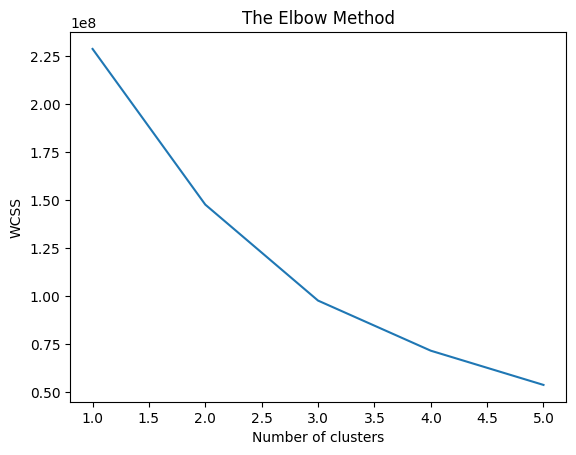

In [20]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Оптимальное количество кластеров - 3.

# KMeans

In [88]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42, n_init=20, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=3, n_init=20, random_state=42)

In [89]:
print('KMeans inertia =', kmeans.inertia_)

KMeans inertia = 97729562.60234044


In [90]:
from sklearn.metrics import silhouette_score
sc_k = silhouette_score(X, kmeans.labels_, random_state=42)
print('KMeans silhouette_score =',sc_k)

KMeans silhouette_score = 0.577710253339086


In [91]:
print('Количество объектов в кластерах:')
print(pd.Series(kmeans.labels_).value_counts())

Количество объектов в кластерах:
0    110963
1     18626
2       382
dtype: int64


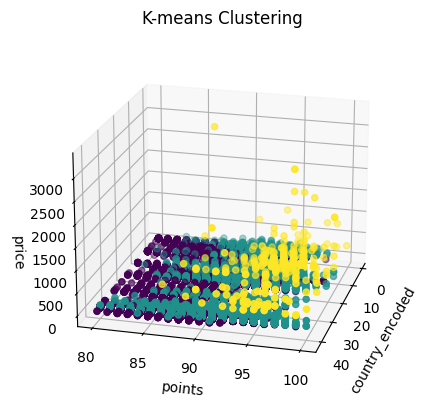

In [92]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['country_encoded'], X['points'], X['price'], c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='r')
ax.set_title('K-means Clustering')
ax.set_xlabel('country_encoded')
ax.set_ylabel('points')
ax.set_zlabel('price')
ax.view_init(elev=20, azim=15)
plt.show()

# DBSCAN

In [97]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(n_jobs=-1)
dbscan.fit(X)

DBSCAN(n_jobs=-1)

In [98]:
sc_db = silhouette_score(X, dbscan.labels_, random_state=42)
print('DBSCAN silhouette_score =', sc_db)

DBSCAN silhouette_score = 0.8220842630983091


In [106]:
print('Количество объектов в кластерах:')
print(pd.Series(dbscan.labels_).value_counts())

Количество объектов в кластерах:
-1       11776
 0         754
 76        693
 338       651
 492       640
         ...  
 2991        5
 2992        5
 2130        5
 2995        5
 3544        5
Length: 3546, dtype: int64


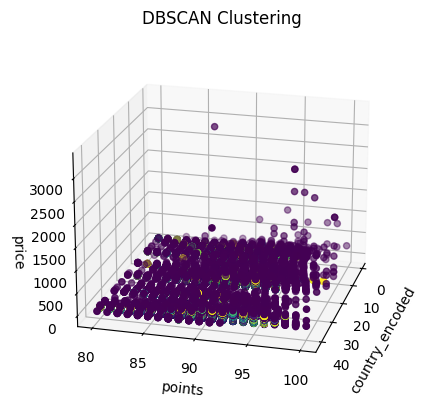

In [100]:
centroids = dbscan.core_sample_indices_
labels = dbscan.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['country_encoded'], X['points'], X['price'], c=labels)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('country_encoded')
ax.set_ylabel('points')
ax.set_zlabel('price')
ax.view_init(elev=20, azim=15)
plt.show()

Визуально KMeans справился лучше, однако у DBSCAN silhouette_score близок к 1, что указывает на хорошую кластеризацию